In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df_metadata = pd.read_csv('gutenberg_with_text.csv')

In [28]:
def get_book_paragraphs(book:str):
    paragraphs = book.split('\n\n')
    return paragraphs

In [29]:
#for each author, get mean paragraph length
authors = []
mean_paragraph_lengths = []
num_paragraphs = []
for index, row in df_metadata.iterrows():
    authors.append(row['Authors'])
    paragraphs = get_book_paragraphs(row['Books'])
    num_paragraphs.append(len(paragraphs))
    mean_paragraph_lengths.append(np.mean([len(paragraph) for paragraph in paragraphs]))

#sort by mean paragraph length
df_paragraphs = pd.DataFrame({'Author': authors, 'Mean Paragraph Length': mean_paragraph_lengths, 'Number of Paragraphs': num_paragraphs})
df_paragraphs
   

,Author,Mean Paragraph Length,Number of Paragraphs
0,"Alcott, Louisa May",283.567839,199
1,"Austen, Jane",359.908738,515
2,"Balzac, Honoré de",106.373571,1574
3,"Barrie, J. M. (James Matthew)",377.647059,221
4,"Baum, L. Frank (Lyman Frank)",160.096558,2092
...,...,...,...
71,"Wells, H. G. (Herbert George)",696.395722,187
72,"Wharton, Edith",272.339130,230
73,"Widger, David",358.983333,360
74,"Wilde, Oscar",254.133065,248


<BarContainer object of 76 artists>

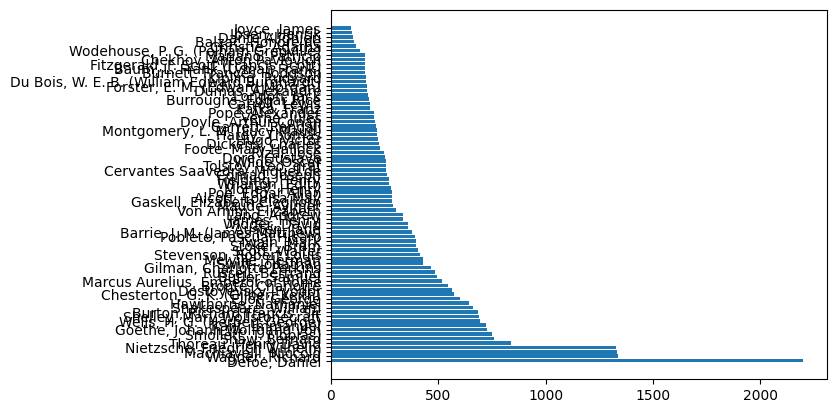

In [30]:
#plot sorted mean paragraph length vs author
import matplotlib.pyplot as plt
df_paragraphs = df_paragraphs.sort_values(by=['Mean Paragraph Length'], ascending=False)

plt.barh(df_paragraphs['Author'], df_paragraphs['Mean Paragraph Length'])


<BarContainer object of 76 artists>

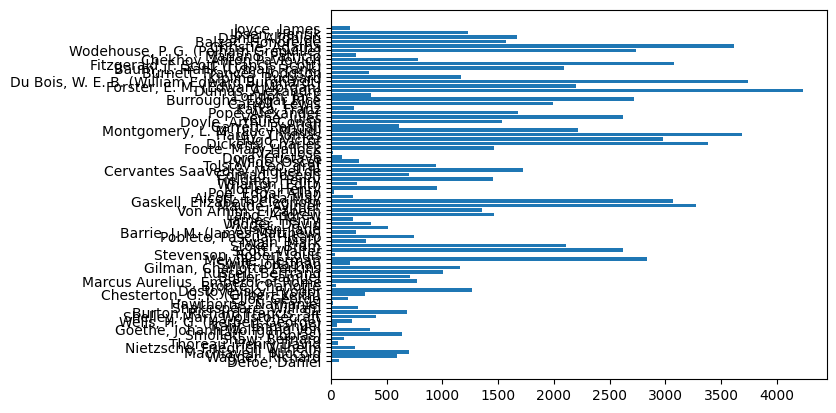

In [31]:
#plot authors vs number of paragraphs
plt.barh(df_paragraphs['Author'], df_paragraphs['Number of Paragraphs'])

<BarContainer object of 76 artists>

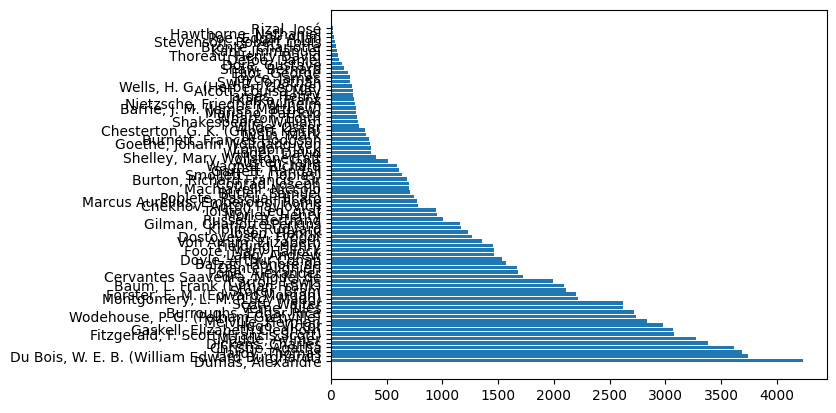

In [32]:
#plot authors vs number of paragraphs
df_paragraphs = df_paragraphs.sort_values(by=['Number of Paragraphs'], ascending=False)
plt.barh(df_paragraphs['Author'], df_paragraphs['Number of Paragraphs'])


In [40]:
# divide into n subplots
n = 3 # number of subplots
data = [pd.DataFrame() for _ in range(n)]
for i in range(n):
    start = int(i * len(df_paragraphs) / n)
    end = int((i+1) * len(df_paragraphs) / n)
    data[i] = df_paragraphs.iloc[start:end]


Author                   0
Mean Paragraph Length    0
Number of Paragraphs     0
dtype: int64
[                                          Author  Mean Paragraph Length  \
23                              Dumas, Alexandre             169.702384   
22  Du Bois, W. E. B. (William Edward Burghardt)             165.014698   
33                                 Hardy, Thomas             214.369306   
14                              Christie, Agatha             116.185667   
18                              Dickens, Charles             222.146154   
47                                 Maude, Aylmer             291.134474   
26          Fitzgerald, F. Scott (Francis Scott)             159.467532   
30                   Gaskell, Elizabeth Cleghorn             285.657534   
35                                  Hugo, Victor             218.893289   
48                              Melville, Herman             427.958025   
75           Wodehouse, P. G. (Pelham Grenville)             134.971846   
7    

<BarContainer object of 25 artists>

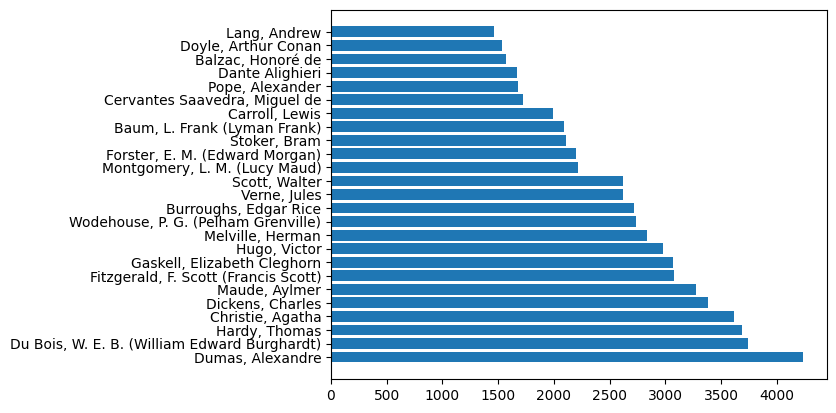

In [34]:
plt.barh(data[0]['Author'], data[0]['Number of Paragraphs'])

<BarContainer object of 26 artists>

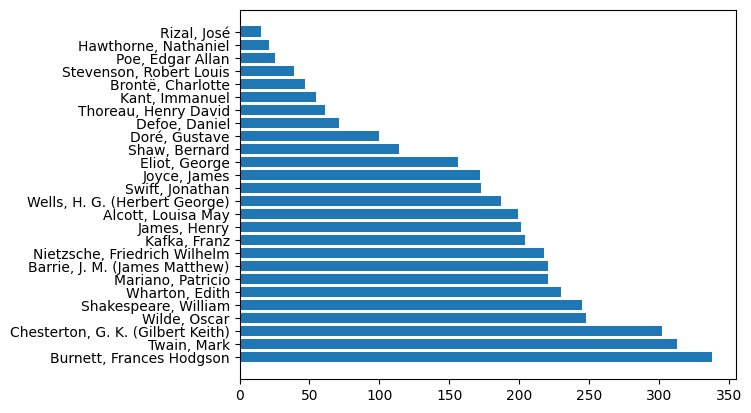

In [35]:
plt.barh(data[n-1]['Author'], data[n-1]['Number of Paragraphs'])